In [1]:
import numpy as np
from sklearn.cluster import KMeans

def cluster_data(data, n_clusters):
    """
    聚类函数
    :param data: 二维数组，每一行是一个数据点，每一列是一个特征
    :param n_clusters: 聚类的数量
    :return: 分组矩阵，每一行对应一个数据点的聚类标签
    """
    # 检查输入数据是否为二维数组
    if not isinstance(data, np.ndarray) or len(data.shape) != 2:
        raise ValueError("输入数据必须是二维数组！")
    
    # 检查聚类数量是否合理
    if n_clusters <= 0 or n_clusters > len(data):
        raise ValueError("聚类数量必须大于0且小于等于数据点数量！")
    
    # 使用K-Means算法进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
    kmeans.fit(data)
    
    # 获取每个数据点的聚类标签
    labels = kmeans.labels_
    
    # 将标签转换为分组矩阵
    # 分组矩阵的每一行对应一个数据点，值为1表示该数据点属于该聚类，否则为0
    group_matrix = np.zeros((len(data), n_clusters), dtype=int)
    for i, label in enumerate(labels):
        group_matrix[i, label] = 1
    
    return group_matrix


data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
])

# 聚类数量
n_clusters = 3

# 调用聚类函数
group_matrix = cluster_data(data, n_clusters)

# 打印结果
print("分组矩阵：")
print(group_matrix)


分组矩阵：
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [22]:
def svd_decomposition(matrix):
    """
    对输入矩阵进行SVD分解，并输出特征向量（奇异向量）所组成的矩阵。
    :param matrix: 输入矩阵，形状为 (m, n)
    :return: 左奇异向量矩阵 U 和右奇异向量矩阵 V^T
    """
    # 检查输入矩阵是否为二维数组
    if not isinstance(matrix, np.ndarray) or len(matrix.shape) != 2:
        raise ValueError("输入必须是二维数组！")
    
    # 执行SVD分解
    U, S, VT = np.linalg.svd(matrix, full_matrices=True)
    
    return U[:,:2]

In [39]:
var_mat1 = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
var_mat2 = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])

import numpy as np

def cosine_similarity(array1, array2):
    """
    计算两个一维数组的余弦相似度。
    :param array1: 第一个一维数组
    :param array2: 第二个一维数组
    :return: 余弦相似度值（介于 -1 和 1 之间）
    """
    # 检查输入是否为一维数组
    if not isinstance(array1, np.ndarray) or not isinstance(array2, np.ndarray):
        raise ValueError("输入必须是 NumPy 数组！")
    if len(array1.shape) != 1 or len(array2.shape) != 1:
        raise ValueError("输入必须是一维数组！")
    if len(array1) != len(array2):
        raise ValueError("两个数组的长度必须相同！")
    
    # 计算点积
    dot_product = np.dot(array1, array2)
    
    # 计算范数
    norm1 = np.linalg.norm(array1)
    norm2 = np.linalg.norm(array2)
    
    # 计算余弦相似度
    cosine_sim = dot_product / (norm1 * norm2)
    
    return np.abs(cosine_sim)

def sim_mat(mat1, mat2):
    sim_lss = []
    for i in range(mat1.shape[1]):
        sim_ls = []
        for j in range(mat2.shape[1]):
            sim = cosine_similarity(mat1[:,i], mat2[:,j])
            sim_ls.append(sim)
        sim_lss.append(np.max(sim_ls))
    return np.mean(sim_lss)
        

def distance(mat1, mat2):
    dis1 = np.abs(mat1 - mat2)
    dis2 = np.abs(mat1 - mat2[:,::-1])
    return np.min([np.mean(dis1), np.mean(dis2)])

dis_ls = []
for mat in group_list:
    diss1 = distance(mat, var_mat1)
    diss2 = distance(mat, var_mat2)
    dis_ls.append(diss1 + diss2)


In [47]:
import sys
sys.path.append("../../..")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from func.iit_tpm import make_tpm, tpm_series, dis_mean
from func.grn_tpm import iit_tpm_cal

n = 5
a_ls = np.linspace(0,1,n)
b_ls = np.linspace(0,1,n)
c_ls = np.linspace(0,1,n)
d_ls = np.linspace(0,1,n)
n_clusters = 2
var_mat1 = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
var_mat2 = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])
group_list = []
exp_ls = []
syn_ls = []
int_ls = []
dis_ls = []
for a in a_ls:
    for b in b_ls:
        for c in c_ls:
            for d in d_ls:
                tpm = np.array([[a, 1-a],[b, 1-b],[c,1-c],[d, 1-d]])
                #group_matrix = cluster_data(tpm, n_clusters)
                group_matrix = svd_decomposition(tpm)
                un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=1, en_size=1, dis=True, new_item=False) 
                group_list.append(group_matrix)
                exp_ls.append(expansive)
                syn_ls.append(syn)
                int_ls.append(introverted)
                diss1 = sim_mat(group_matrix, var_mat1)
                diss2 = sim_mat(group_matrix, var_mat2)
                dis_ls.append(diss1**2 + diss2**2)
#                 if diss1 + diss2 == 1 and expansive == 0:
#                     print(tpm)


In [40]:
group_list = []
syn_ndeg_ls = []
syn_det_ls = []
syn_ls = []
dis_ls = []

for a in a_ls:
    for b in b_ls:
        for c in c_ls:
            for d in d_ls:
                tpm = np.array([[a, 1-a],[b, 1-b],[c,1-c],[d, 1-d]])
                #group_matrix = cluster_data(tpm, n_clusters)
                group_matrix = svd_decomposition(tpm)
                un_sys, un_en, syn, syn_ndeg, syn_det, tpm_dic = iit_tpm_cal(tpm, mech_size=1, en_size=1, dis=True, new_item=True) 
                group_list.append(group_matrix)
                syn_ndeg_ls.append(syn_ndeg)
                syn_ls.append(syn)
                syn_det_ls.append(syn_det)
#                 diss1 = distance(group_matrix, var_mat1)
#                 diss2 = distance(group_matrix, var_mat2)
                diss1 = sim_mat(group_matrix, var_mat1)
                diss2 = sim_mat(group_matrix, var_mat2)
                dis_ls.append(diss1**2 + diss2**2)
#                 if diss1**2 + diss2**2 < 0.51 and syn < 0.1:
#                     print(tpm)
#                     print('group:', group_matrix)


[[0.25 0.75]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.25 0.75]]
group: [[-0.53010252  0.46796508]
 [-0.46796508 -0.53010252]
 [-0.46796508 -0.53010252]
 [-0.53010252  0.46796508]]
[[0.25 0.75]
 [0.5  0.5 ]
 [0.75 0.25]
 [0.5  0.5 ]]
group: [[-5.00000000e-01  7.07106781e-01]
 [-5.00000000e-01  4.99631513e-17]
 [-5.00000000e-01 -7.07106781e-01]
 [-5.00000000e-01  7.61313589e-17]]
[[0.25 0.75]
 [0.75 0.25]
 [0.5  0.5 ]
 [0.5  0.5 ]]
group: [[-5.00000000e-01  7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01]
 [-5.00000000e-01  1.28467774e-16]
 [-5.00000000e-01  1.28467774e-16]]
[[0.5  0.5 ]
 [0.25 0.75]
 [0.25 0.75]
 [0.5  0.5 ]]
group: [[-0.46796508  0.53010252]
 [-0.53010252 -0.46796508]
 [-0.53010252 -0.46796508]
 [-0.46796508  0.53010252]]
[[0.5  0.5 ]
 [0.25 0.75]
 [0.5  0.5 ]
 [0.75 0.25]]
group: [[-5.00000000e-01 -7.26842737e-17]
 [-5.00000000e-01 -7.07106781e-01]
 [-5.00000000e-01  1.10493180e-16]
 [-5.00000000e-01  7.07106781e-01]]
[[0.5  0.5 ]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.75 0.25]]
group:

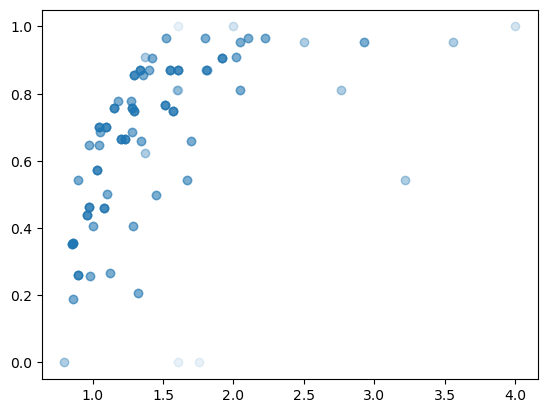

In [51]:
#plt.scatter(dis_ls, exp_ls, alpha=0.1)
dis_c = [1/i for i in dis_ls]
plt.scatter(dis_c, syn_ndeg_ls, alpha=0.1)

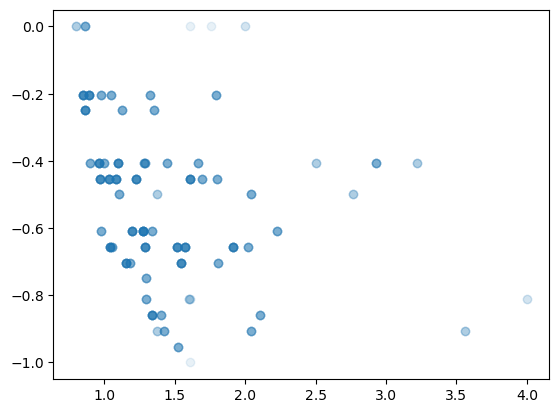

In [52]:
plt.scatter(dis_c, syn_det_ls, alpha=0.1)

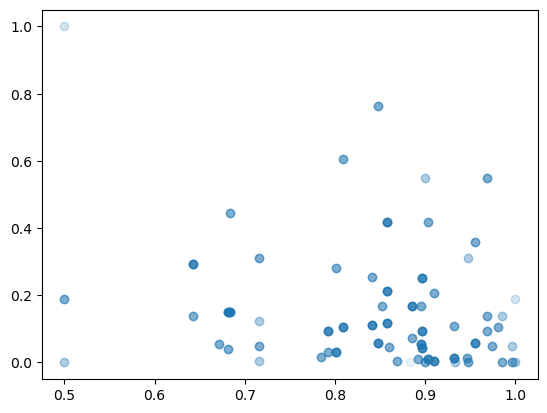

In [36]:
plt.scatter(dis_ls, syn_ls, alpha=0.1)

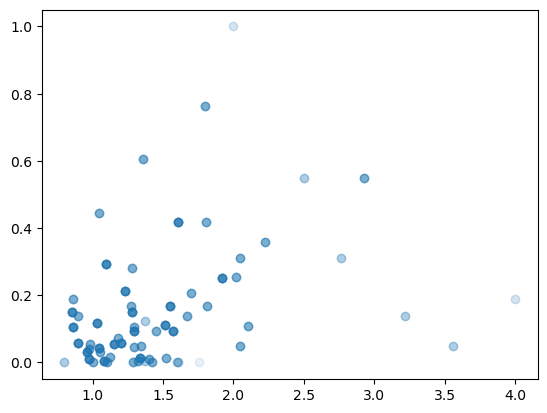

In [50]:
dis_c = [1/i for i in dis_ls]
plt.scatter(dis_c, syn_ls, alpha=0.1)